UTS IOT 

Import Library Yang Dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as py
import math
import numpy as np #digunakan untuk oprasi matematika
from scipy.signal import butter, lfilter, freqz

In [2]:
read_file = pd.read_excel ('dataset.xls')
read_file.to_csv ('data.csv', index = None, header=True)
read_file = pd.read_excel ('dataset2.xls')
read_file.to_csv ('data2.csv', index = None, header=True)

In [4]:
df = pd.read_csv('data.csv')#untuk Gyroscope
df.head()

,Time (s),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Absolute (rad/s)
0,0.013880,-0.022000,-0.011000,0.077550,0.081357
1,0.016378,-0.003987,-0.014162,0.073288,0.074750
2,0.018877,0.028050,-0.018288,0.075488,0.082581
3,0.021378,0.062013,-0.025575,0.074387,0.100166
4,0.023874,0.089650,-0.029838,0.062700,0.113396


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28455 entries, 0 to 28454
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time (s)             28455 non-null  float64
 1   Gyroscope x (rad/s)  28455 non-null  float64
 2   Gyroscope y (rad/s)  28455 non-null  float64
 3   Gyroscope z (rad/s)  28455 non-null  float64
 4   Absolute (rad/s)     28455 non-null  float64
dtypes: float64(5)
memory usage: 1.1 MB


In [6]:
df.describe()

,Time (s),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Absolute (rad/s)
count,28455.000000,28455.000000,28455.000000,28455.000000,28455.000000
mean,35.566287,0.053270,-0.162554,-0.030094,1.263940
std,20.530298,0.486371,0.897820,1.131432,0.869105
min,0.013880,-2.078038,-4.782113,-3.103375,0.006097
25%,17.787259,-0.158263,-0.460075,-0.728063,0.643200
50%,35.560888,0.034513,-0.124987,-0.337425,0.988645
75%,53.349633,0.264275,0.176412,0.305800,1.798900
max,71.123511,3.335613,5.181000,3.414950,5.378314


In [7]:
df2 = pd.read_csv('data2.csv') #untuk Acceleration
df2.head()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.004654,-1.05195,9.271050,0.99495,9.383438
1,0.019600,-0.88395,9.379050,1.06395,9.480503
2,0.022098,-0.90795,9.427051,1.05705,9.529481
3,0.024597,-0.91800,9.406950,0.93000,9.497280
4,0.027095,-0.93405,9.391050,0.85605,9.476133


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25141 entries, 0 to 25140
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time (s)                       25141 non-null  float64
 1   Acceleration x (m/s^2)         25141 non-null  float64
 2   Acceleration y (m/s^2)         25141 non-null  float64
 3   Acceleration z (m/s^2)         25141 non-null  float64
 4   Absolute acceleration (m/s^2)  25141 non-null  float64
dtypes: float64(5)
memory usage: 982.1 KB


In [9]:
df2.describe()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
count,25141.000000,25141.000000,25141.000000,25141.000000,25141.000000
mean,31.446430,-1.916613,9.185108,-0.889783,10.209907
std,18.152227,3.109495,2.273155,2.349431,2.223632
min,0.004654,-27.355951,0.816000,-15.999001,2.986358
25%,15.720537,-3.274050,8.514000,-2.079000,9.337426
50%,31.448604,-1.564050,9.312000,-0.925050,9.686880
75%,47.176706,-0.388050,9.910050,0.553950,10.752648
max,62.880259,16.948051,29.478001,16.498051,32.834435


In [10]:
#data Gyroscop dimasukan kedalam Array

x = [] #dimana data Gyroscope x (rad/s) ditaruh
y = [] #dimana data Gyroscope y (rad/s) ditaruh
z = [] #dimana data Gyroscope z (rad/s) ditaruh
a = [] #dimana data Absolute (rad/s) ditaruh
t = [] #dimana data Time (s)

for i in range(len(df.values)):
  t.append(df.values[i][0])

for i in range(len(df.values)):
  x.append(df.values[i][1])
  
for i in range(len(df.values)):
  y.append(df.values[i][2])

for i in range(len(df.values)):
  z.append(df.values[i][3])

for i in range(len(df.values)):
  a.append(df.values[i][4])


x=np.array(x)
t=np.array(t)
y=np.array(y)
z=np.array(z)
a=np.array(a)

In [11]:
#data Acceleration dimasukan kedalam Array

x2 = [] #dimana data Acceleration x (m/s^2) ditaruh
y2 = [] #dimana data Acceleration y (m/s^2) ditaruh
z2 = [] #dimana data Acceleration z (m/s^2) ditaruh
a2 = [] #dimana data Absolute acceleration (m/s^2) ditaruh
t2 = [] #dimana data Time (s)

for i in range(len(df2.values)):
  t2.append(df2.values[i][0])

for i in range(len(df2.values)):
  x2.append(df2.values[i][1])
  
for i in range(len(df2.values)):
  y2.append(df2.values[i][2])

for i in range(len(df2.values)):
  z2.append(df2.values[i][3])

for i in range(len(df2.values)):
  a2.append(df2.values[i][4])


x2=np.array(x2)
t2=np.array(t2)
y2=np.array(y2)
z2=np.array(z2)
a2=np.array(a2)

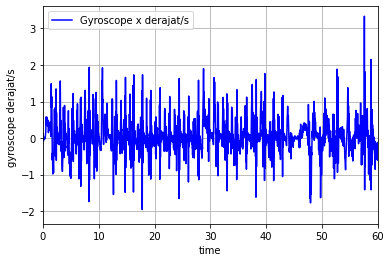

In [54]:
py.plot(t, x, 'b-',label='Gyroscope x derajat/s')
plt.xlim([0, 60])
py.ylabel('gyroscope derajat/s ')
py.xlabel('time')
py.grid()
py.legend()

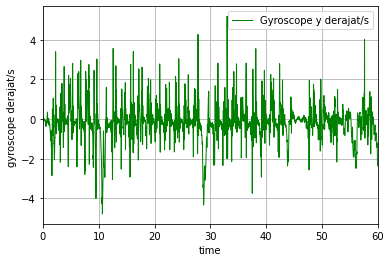

In [57]:
py.plot(t, y, 'g-',linewidth=1, label='Gyroscope y derajat/s')
plt.xlim([0, 60])
py.ylabel('gyroscope derajat/s ')
py.xlabel('time')
py.grid()
py.legend()

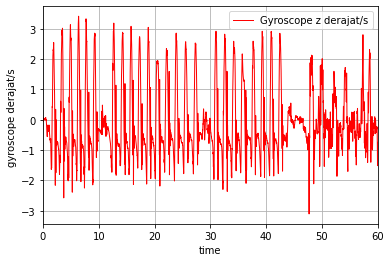

In [76]:
py.plot(t, z, 'r-',linewidth=1, label='Gyroscope z derajat/s')
py.xlabel('Gyroscope z = time s')
plt.xlim([0, 60])
py.ylabel('gyroscope derajat/s ')
py.xlabel('time')
py.grid()
py.legend()

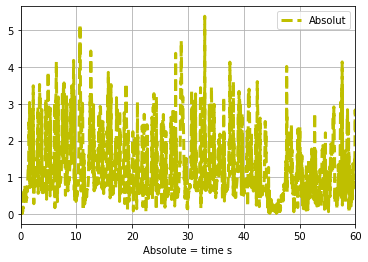

In [16]:
py.plot(t, a, 'y-',linestyle="--",linewidth=3, label='Absolut')
py.xlabel('Absolute = time s')
plt.xlim([0, 60])
py.grid()
py.legend()

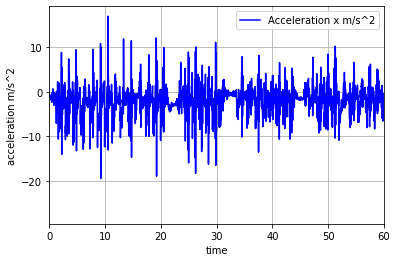

In [61]:
py.plot(t2, x2, 'b-',label='Acceleration x m/s^2')
py.xlabel('Gyroscope x = time s')
plt.xlim([0, 60])
py.ylabel('acceleration m/s^2')
py.xlabel('time')
py.grid()
py.legend()

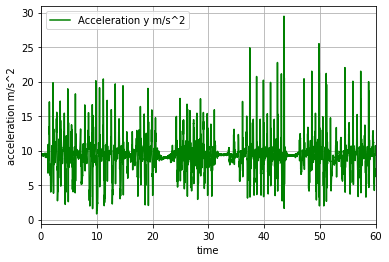

In [63]:
py.plot(t2, y2, 'g-',label='Acceleration y m/s^2')
py.xlabel('Gyroscope x = time s')
plt.xlim([0, 60])
py.ylabel('acceleration m/s^2')
py.xlabel('time')
py.grid()
py.legend()

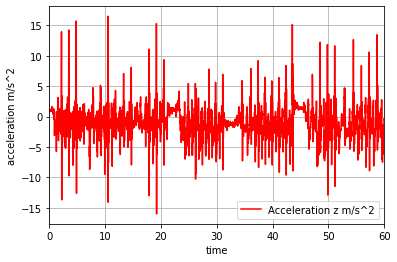

In [65]:
py.plot(t2, z2, 'r-',label='Acceleration z m/s^2')
py.xlabel('Gyroscope x = time s')
plt.xlim([0, 60])
py.ylabel('acceleration m/s^2')
py.xlabel('time')
py.grid()
py.legend()

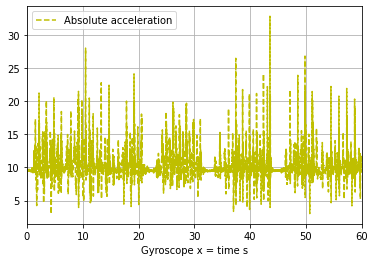

In [21]:
py.plot(t2, a2, 'y-', linestyle="--",label='Absolute acceleration')
py.xlabel('Gyroscope x = time s')
plt.xlim([0, 60])
py.grid()
py.legend()

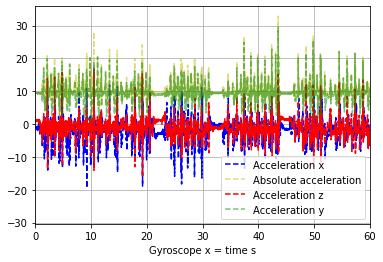

In [22]:
py.plot(t2, x2, 'b-', linestyle="--",label='Acceleration x')
py.plot(t2, a2, 'y-', linestyle="--",label='Absolute acceleration',alpha = 0.5)
py.plot(t2, z2, 'r-', linestyle="--",label='Acceleration z')
py.plot(t2, y2, 'g-', linestyle="--",label='Acceleration y',alpha = 0.5)
plt.xlim([0, 60])
py.xlabel('Gyroscope x = time s')
py.grid()
py.legend()

In [23]:
print(z2)

[0.99495006 1.06395006 1.05705011 ... 1.22505009 1.29705012 1.37295008]


In [24]:
print(y2)

[9.27105045 9.37905025 9.42705059 ... 9.40005016 9.36405087 9.40695   ]


NO 4 Ubahlah data accelerometer untuk mendapatkan sudut accelerometer

In [25]:
import math
the = []
for i in range(len(df2.values)):
    theta = math.atan2(z2[i], y2[i])
    the.append(theta)
    print(theta) 

0.10690876733717841
0.112956127640323
0.11166304017471564
0.0985428646275106
0.09090470677496704
0.09104933954637694
0.08717611002859885
0.09087636566494056
0.0817877593899846
0.08749533947835865
0.0917955758542217
0.086274210213952
0.0971762261481084
0.1035575801963812
0.1107202724901467
0.11324899237023878
0.11346956012839293
0.11722539782159196
0.12063170721413484
0.1237221999355769
0.1244395803509377
0.11960267591096639
0.11826434011814747
0.11516596209029242
0.11018566481902374
0.10821540816554838
0.10706287367016386
0.10723172356132936
0.10283355945655259
0.09377367781111079
0.1034837393763054
0.10451025234234636
0.10149877084565244
0.10050232059349319
0.09675813196688048
0.09796894235003493
0.09515272182111877
0.10134515313786562
0.10145444814379967
0.10374979905792303
0.10384132994204912
0.1048827656728108
0.10173948930689572
0.09527900887741728
0.10186873554087299
0.10405805559277496
0.10389366803962442
0.10896235840832574
0.11072008912758906
0.1113621909306609
0.1117756069279

0.30347337052606593
0.2957527949450782
0.2868784214698731
0.2744852488659476
0.2557926790002442
0.23088026930828698
0.20527168953057207
0.18097327477998118
0.14467740150392583
0.11169621851356278
0.08165038740894545
0.043327605839440904
0.005818868467003472
-0.024152962609347812
-0.053722413154924265
-0.0851968220403162
-0.11852194587594989
-0.14266078561254225
-0.16699448593701516
-0.18671500990385684
-0.20634177308458646
-0.21046771096003103
-0.21461686030459298
-0.22204381873162798
-0.22382786651041045
-0.2231378382611229
-0.2327988548851673
-0.24763531114480386
-0.26285031277346227
-0.2745511502343996
-0.2859490837670252
-0.2936910418773899
-0.29736946149040694
-0.2906813149185639
-0.28449598020372796
-0.26721105360309116
-0.2545005593212607
-0.23424733235656045
-0.19886081664143077
-0.17462020235927966
-0.14980677881379015
-0.12160428004448952
-0.08587509333217151
-0.047215039968202026
-0.0159087887217028
0.02464580215036495
0.06939671646361503
0.10640820766740713
0.14789983384121

-0.13486426736207488
-0.05643548149536947
0.012778965768939762
0.07810906629484635
0.1386685128555961
0.15775981734160385
0.163238395898296
0.15057035346104047
0.11635556927135633
0.07574644363175204
0.03951219207583487
-0.003793478556614162
-0.06560810062849108
-0.10261321425713436
-0.158391854896538
-0.21087440031601595
-0.2524586719864895
-0.28929837798181185
-0.325326966042899
-0.3744674443491684
-0.4048290379917149
-0.439810927262193
-0.47530547154811864
-0.5029022348387582
-0.5262033500343902
-0.5485721560145146
-0.5736869251497755
-0.5878682662378623
-0.5879683945486917
-0.6041929699530633
-0.5970918758883503
-0.5796544368076761
-0.5551177960938639
-0.5319197449039715
-0.5026627000621556
-0.46057233833191763
-0.4183323399341879
-0.3751471267390817
-0.3297081322139583
-0.3018450086142933
-0.27492961558671614
-0.24643888544997172
-0.23081529928772554
-0.217250312875882
-0.21134606059156077
-0.2082526222405052
-0.20146573443752816
-0.20403856303580223
-0.2208720925197156
-0.1932429

-0.058206113479127096
-0.056061964060758036
-0.053508272897230535
-0.06083828149507306
-0.06099131145490057
-0.0712144835950531
-0.06633579936481213
-0.06325406375269596
-0.06339836814613585
-0.0555485750995628
-0.04275018809836888
-0.03948953512696963
-0.04015612678314498
-0.03939704656126702
-0.04183885643386961
-0.043214061617531205
-0.049173063872728344
-0.05742541970789435
-0.0628128944934305
-0.06392765646074015
-0.06717091477893769
-0.07267505039142921
-0.08996685407433848
-0.10098714070978676
-0.11845640452888069
-0.14236010522712736
-0.16037570210800917
-0.16760999301113036
-0.17104811309960535
-0.17400806019695814
-0.16788484940375828
-0.15669649002247454
-0.1571081414566265
-0.1586316202719606
-0.16720969994726442
-0.18308172790482366
-0.18588005964121002
-0.1917570344928076
-0.19460546725263989
-0.20079244544607025
-0.19281620671693708
-0.1858678098529293
-0.18160668036268016
-0.17410759082337238
-0.18152999694203759
-0.17851620274931393
-0.1755158638844937
-0.1749859009718

-0.011412503079288485
-0.0446894472441775
-0.09645609755633679
-0.1625411928084783
-0.24143128783453885
-0.320249818512914
-0.39030867931792335
-0.46650438270072836
-0.5186302546961502
-0.5263075947470025
-0.5051142137615657
-0.4610103840565184
-0.3895725227849312
-0.3079680641164094
-0.23270366406073148
-0.19344561827062123
-0.21993012328203662
-0.3130376907035601
-0.45016983031382873
-0.6056453760472443
-0.7388169013425394
-0.8231389056776233
-0.8616558236523493
-0.855471792425494
-0.8157616154988327
-0.7513361066896788
-0.6465963297773134
-0.5115084363763325
-0.36523680537448117
-0.21359717935129827
-0.08788279539942519
0.006731122956244976
0.08111489607925956
0.12495022705720735
0.16072665400649847
0.1768778143862207
0.18816937821386515
0.20152131611114632
0.21678896008792534
0.228026131737731
0.2549236262998332
0.27460596249679353
0.3100836286765163
0.33406151470134177
0.34725141046996094
0.3402643933772242
0.29351260176145466
0.21796384505617666
0.10241837720161963
-0.01192816012

-0.5498834377259396
-0.5724192325278915
-0.5744434342221989
-0.5784215485323391
-0.5851448931373491
-0.5974863684798698
-0.6011713277902525
-0.6090604603207237
-0.6083552645702748
-0.6041120484073977
-0.6013362007777325
-0.5879942370050366
-0.5772521706109642
-0.5549015191503853
-0.5329369391343678
-0.5130820060512973
-0.4650412665730786
-0.42066876283588783
-0.36679042548697627
-0.3062225841660966
-0.24021445672812558
-0.1800161851439265
-0.15296612186640735
-0.10759678192773035
-0.07693826722719066
-0.05037424685270585
-0.03742931857772395
-0.03436108384075305
-0.03231589626346795
-0.042926159324254864
-0.03693640855311772
-0.049506683715227144
-0.05164809144952374
-0.056796611142412586
-0.05844913046569697
-0.06322775714285601
-0.06445929141386696
-0.05259568056818542
-0.027105570385309145
-0.020494884293125883
0.002427906280489409
0.011854418165374596
0.02900540164400609
0.049947298849507285
0.07579514537611352
0.11672666374472859
0.15134150605240781
0.18545574287294708
0.228661959

-0.19966544613570825
-0.17376515527004466
-0.12761012432615615
-0.07021956306336762
-0.02235448668964919
0.014993298505206901
0.04487692849222649
0.0583022727968024
0.0478664698344602
0.02810389653917445
0.013001729936886714
-0.001836410745640805
-0.02576642185087396
-0.05253328930584672
-0.08360355592182475
-0.11029022003168736
-0.12460086058997114
-0.1351844303179793
-0.14311106890991765
-0.1418035732155757
-0.14819109047540516
-0.15141931460876884
-0.15802867073480295
-0.17259376999510834
-0.18345021744544734
-0.1935967514403444
-0.20623085723198212
-0.21174309809740774
-0.2199499461932215
-0.22092377949166214
-0.2241474407544049
-0.22810015714314755
-0.2380332392989224
-0.24932946643522721
-0.2533806121077111
-0.2648506426889311
-0.2757948790841976
-0.27507498934958735
-0.27092359255837006
-0.26033587060342933
-0.25505825285866246
-0.2375163859287724
-0.22088333998669193
-0.2012532401746346
-0.1844637030916572
-0.1720240444877537
-0.16256912143423577
-0.15489671394289156
-0.1534752

-0.3855382570313689
-0.4779294541794885
-0.5642439126479699
-0.6576992175772168
-0.7191054272494848
-0.7497550960629519
-0.7583917465539816
-0.7322350304117405
-0.6825875106936922
-0.6294226389776927
-0.543196715187646
-0.4246810994530192
-0.30827873173470793
-0.1916650579570898
-0.08176578803346524
0.01242917031099345
0.04913165501459844
0.02780721705112664
0.008326746310258752
-0.01350409471065334
-0.06188568564202608
-0.12278812222602908
-0.17812022521334236
-0.2419275328995576
-0.296160389828136
-0.34528867868674984
-0.36622766657708505
-0.36389220306194797
-0.33618424916517875
-0.2897979574150755
-0.2477061517312753
-0.21500207516356418
-0.19268231067092337
-0.18669864405131725
-0.1948219615919236
-0.21762081240139025
-0.24628402113741407
-0.2858354001706934
-0.3145695205558534
-0.3447445249147309
-0.3829411483432727
-0.39070363304388794
-0.3971558195675648
-0.39947241786840987
-0.37012317738013695
-0.33794940967221826
-0.27359277551155026
-0.19478598939184086
-0.09800549211915086

-0.2362169765361584
-0.21408678313677212
-0.1942488493803132
-0.1706508863373403
-0.15793126158926998
-0.1582447425314358
-0.15764700180944516
-0.1549471044499032
-0.1623549342348243
-0.16878893387129895
-0.1766483334752709
-0.1922782834758005
-0.21098869959120123
-0.21918585702951854
-0.22242159850602136
-0.2247115686890687
-0.22364544832255964
-0.21124491956114436
-0.20353424597465433
-0.20256289813255493
-0.20114506985904956
-0.204883078115097
-0.20871518747125542
-0.2108630477594091
-0.2125515849345975
-0.2014368801345318
-0.19077732552567928
-0.1750247446104924
-0.15410674420448847
-0.136604207752946
-0.13192591011090085
-0.1284323630966695
-0.13239909900203628
-0.13856157354659837
-0.14328297870952392
-0.15018404398709856
-0.14765131819852464
-0.13901907356258864
-0.12536666801559307
-0.10911635863384403
-0.09763443943353135
-0.09518931482417771
-0.09605929361268907
-0.08991637790907266
-0.08877767489141711
-0.1008853209875987
-0.11404283874389316
-0.1291640363437182
-0.140375689

0.19307611854790957
0.16584878234707343
0.13586035853091047
0.11812221662330157
0.11263196243488724
0.10804318723035601
0.11285191992458365
0.123816774449302
0.13998766376869212
0.15243510386579187
0.160878319078953
0.17623970231206654
0.18058918381720987
0.19247398898907792
0.19501605775351288
0.20531243493636894
0.2156415399306903
0.23059537007208547
0.24083390537206692
0.2669254927031985
0.2915727003159039
0.3272243427689826
0.36230861726347485
0.3968216827445525
0.4189246399928517
0.434094355999053
0.4389422505125837
0.42834587954400866
0.41733204493382986
0.403325357586641
0.3829184194141575
0.3674674265063609
0.3492607906637645
0.32473215998576793
0.3091146842865029
0.29216947086983336
0.2827539565835393
0.2685606295807901
0.2594380846922846
0.24844296592894202
0.2410691090058016
0.23329504752603888
0.22673879769486302
0.21708508286190442
0.20847378862808805
0.19742197013342483
0.17445756644244648
0.1592222455574992
0.14009439600212603
0.128495106942965
0.120670292463575
0.113163

-0.5136387552921031
-0.516962230323366
-0.5206592343657419
-0.521569162694993
-0.5186712145040838
-0.5123694982336119
-0.4917225830971336
-0.4768463733918197
-0.4471626250256966
-0.4141385625407081
-0.390453755900537
-0.36501385540166575
-0.3481966501779497
-0.33984078953595503
-0.3335240978063672
-0.3359802400046865
-0.34917584506059496
-0.35029721444099926
-0.3686611148995814
-0.3864319764347417
-0.39955593873351253
-0.4163545952337647
-0.4344915681342508
-0.4563309497428934
-0.4740491687972823
-0.484839035791152
-0.49463653991517326
-0.5031200620058834
-0.513230454517357
-0.5121212954499096
-0.5109829978432272
-0.49733845755115824
-0.47861048460765093
-0.470970979184987
-0.4603060918856058
-0.4483539009037483
-0.4363111812894998
-0.43248408835422103
-0.4261653992791322
-0.4281872180534318
-0.42036673748322767
-0.418096982661979
-0.41953343793249165
-0.41863960493580316
-0.41075210732775075
-0.40434011182494883
-0.3989154493502904
-0.39391884803155836
-0.3784133554440389
-0.369249654

-0.5008124947847542
-0.5160024179471074
-0.5350613008980599
-0.5444877768240525
-0.5638679570207085
-0.5805273967960866
-0.5906945681023673
-0.5891738689770222
-0.5873819575786088
-0.5767066221158056
-0.5613191550821592
-0.5416683635468514
-0.5272591825818183
-0.5119082689551487
-0.4864066305664462
-0.4749990277214262
-0.4588544213785971
-0.4409796454301902
-0.43722627522051905
-0.42868428839724243
-0.4247043405152444
-0.4179609792616906
-0.4190138235553229
-0.40692661359711935
-0.40418470802600176
-0.40575240400555757
-0.40482122092770667
-0.40613677241067847
-0.4044209104826271
-0.39836529087374317
-0.4006249382908159
-0.390316505373335
-0.3862372095966336
-0.3876775422038858
-0.3819290670013749
-0.39030229131509847
-0.3799310095079309
-0.37447968316751234
-0.369220550541678
-0.36001163453579904
-0.3462582570145459
-0.3354665741209186
-0.3234082860621963
-0.3145694824313808
-0.3026942911476189
-0.28855099810629903
-0.27700211016023135
-0.2626539293402119
-0.24966866006067165
-0.24226

-0.35686644701446846
-0.35503283693801974
-0.338657144937849
-0.3285688812253352
-0.30827312977828963
-0.29188381914264694
-0.2765415122594068
-0.26652300086759295
-0.25727253300425634
-0.254237362382135
-0.2496881666257272
-0.24116170911964913
-0.23745772435591633
-0.2421394557428078
-0.25228301129305186
-0.25196622957594067
-0.2611265486184875
-0.2617888224679783
-0.2644437236597206
-0.25488708822762074
-0.24574057569735352
-0.22789995398729992
-0.2017384927998615
-0.16549063025931277
-0.11845338247280111
-0.07653230999080432
-0.049471699952441425
-0.02180238438302173
-0.009525978922159263
-0.0052225336763480415
-0.01162199493970136
-0.0267252588444041
-0.051745764937213765
-0.08142154190405244
-0.1326284518164795
-0.17994280320048983
-0.20738995632537305
-0.2382300697839142
-0.25281825849098943
-0.2621101510377978
-0.2568823712466487
-0.26251435713466426
-0.24693572157646204
-0.22722632343446958
-0.20680439587247929
-0.17134734751369177
-0.1392242515850226
-0.1127092843662489
-0.087

-0.14089734022110903
-0.13902662916973485
-0.13940173367820768
-0.14175899412988105
-0.14256288145178106
-0.15201992299000783
-0.14726943069429171
-0.15390867812471906
-0.15364217736199426
-0.16190073902916619
-0.16791954636151118
-0.17318397918175957
-0.17933855535842985
-0.18159749835328431
-0.18400628198487723
-0.17883490511981184
-0.17699612748302868
-0.1736305908214882
-0.16737738317966278
-0.1596916340211351
-0.15290108826312404
-0.14464711444531733
-0.143473027475292
-0.13951253947706785
-0.14112533417053968
-0.13961697985849722
-0.13853760636682969
-0.14140394071623769
-0.14006235482755688
-0.14700863586509452
-0.1455971873195652
-0.15327783678243045
-0.15577001652191236
-0.1642483861120116
-0.1680047961025719
-0.16762170650845354
-0.17090689073304904
-0.17208853449737868
-0.17309500675249523
-0.16811972890911062
-0.15702886851659792
-0.1514501272147737
-0.13719685419631908
-0.11759933217637307
-0.09966865373226608
-0.08023258806057172
-0.057012474586090565
-0.05556830088442172

-0.3821654434303341
-0.3905427024914477
-0.39789655932057766
-0.4160825199589128
-0.4310183447768339
-0.4509202344246526
-0.47135952349371796
-0.48895126074723577
-0.4982782430473446
-0.5168300095130979
-0.5175146577293324
-0.5354457113838791
-0.5345980239016147
-0.5333567083874375
-0.5333674655000746
-0.5165804200922783
-0.5043242102910176
-0.48309023049233557
-0.4569287924561811
-0.43592142209899526
-0.4191932933691744
-0.4078660810112151
-0.39497157448195436
-0.3755438874792448
-0.3759581961664717
-0.38965814141402405
-0.39814748438529807
-0.40645851193720706
-0.42089891554187897
-0.43681353951877205
-0.4490768315080378
-0.45678314327079766
-0.46491637838115357
-0.4659700693486979
-0.4604679755039478
-0.4608871679728032
-0.4567919235196785
-0.44722269268094256
-0.43506808483774373
-0.4230389585896861
-0.41169114602181844
-0.4012736718420752
-0.3935870239282662
-0.3932229286548241
-0.3855606482282529
-0.38381894528766786
-0.3747885341858899
-0.38686420480985406
-0.3951472500599839
-0

-0.1965278605696452
-0.19547805004431937
-0.18963344089043171
-0.18215036864703285
-0.1770929313989297
-0.1811083415421729
-0.20145110772494013
-0.23007245832424655
-0.2705290937125279
-0.28907228041704963
-0.29338089763824243
-0.3005887077189254
-0.2874772453967757
-0.2567807559096249
-0.2109083544433499
-0.1518591597331328
-0.09439948119138628
-0.04240221826365415
-0.011785114825622944
0.001850638659369459
0.007670905503918834
0.01666512399616151
0.026329809447312225
0.036971663597550074
0.04518409879209372
0.04297443830557969
0.05387403447819364
0.05061758599582209
0.04293023198364816
0.028488176390981838
0.01930524832208251
0.010742457025372338
-0.0014033109334482005
-0.018770529298919862
-0.0336169219690955
-0.049884934864849954
-0.07492116796831996
-0.10310080610018416
-0.11592937145888331
-0.12463096461981635
-0.1243278763421992
-0.11984181683904085
-0.10272833137567694
-0.09320625416458983
-0.07541552235592483
-0.05969868515413822
-0.04848128538318253
-0.03676354472890831
-0.03

-0.10072961025738672
-0.11821896601634385
-0.16058763544023913
-0.20615930175107586
-0.24652981316540826
-0.2897418262969637
-0.3186459586443097
-0.34253721876324417
-0.3597397131068102
-0.37289428194595275
-0.376854964841388
-0.3697820559436957
-0.36382449254124855
-0.3613400818806792
-0.35056519781514445
-0.3350992201989002
-0.31601487207421486
-0.2936742384645328
-0.2652296410313012
-0.24014517847867803
-0.20051204557077956
-0.17025929980903903
-0.13884613271570498
-0.10406307571333692
-0.08658535701130227
-0.07069883496575566
-0.06261260321664916
-0.05229065968096497
-0.04797054473821988
-0.04839331004108542
-0.05248536920240077
-0.06418863749345678
-0.06998609245550573
-0.08260646935461063
-0.0934485914472036
-0.10493466528916001
-0.11071766815334154
-0.10932169413159962
-0.1130593553537988
-0.10261173849471043
-0.0947414372806336
-0.08379413840583673
-0.07441343757697703
-0.05724978861327962
-0.050606539496731696
-0.033661280852826644
-0.03027790766037379
-0.018165966395422763
-0

-0.43754013815650034
-0.4511797841069915
-0.4569223249590339
-0.4622335329595891
-0.4587889086938992
-0.4452124029415044
-0.42975193478910956
-0.4213350221809305
-0.4073621101079472
-0.39656798110075797
-0.391006824945327
-0.3848584280158556
-0.3801068677535559
-0.37955104696146374
-0.37495742318369407
-0.36638428154960384
-0.36812029286450265
-0.36496824776061504
-0.36299933896682157
-0.35948548652978873
-0.34883482887691525
-0.3415629488028463
-0.3338073634484896
-0.31998866838246065
-0.3013454657623855
-0.29184973415830506
-0.2872374554813711
-0.2818863955268811
-0.2780003849546452
-0.26713898660660484
-0.2660398202807738
-0.26092087474160475
-0.25793932509644035
-0.26015911859196966
-0.2547321417022619
-0.2564506648257482
-0.2534353453389687
-0.25079282056286784
-0.2510966595220873
-0.2423925429601733
-0.24310433212191718
-0.24482789896890403
-0.2521807645637006
-0.2659941053416083
-0.2720876788353078
-0.2819691289539036
-0.2878066042267674
-0.2856980411860436
-0.2865499186754834
-

0.09123194230988196
0.08727589942540431
0.0938128985152989
0.09964816074305144
0.14048691313419875
0.1399181108590138
0.14490935865468993
0.1402530621925008
0.14978482104026933
0.14584959919030172
0.14619274922115708
0.1436175107132044
0.1415926367957656
0.14323773810609103
0.14315572465704227
0.14824310380668484
0.1458303926326478
0.1502983145642024
0.15308260135612636
0.15643890905275068
0.15424027978549146
0.1561409727824345
0.15477162709854483
0.1543278001009638
0.15855548422759572
0.15588893776094478
0.15912057571164295
0.15586442971529818
0.15733581998958546
0.1609623214645926
0.1658279528764428
0.16909972825424355
0.17334599036773135
0.17948996131380607
0.18613565545576297
0.18518672873551079
0.19203484062778467
0.19208340461687887
0.1893903853442589
0.19187125661394794
0.18613625641401332
0.17704799926806958
0.17146015886325272
0.1620275158437798
0.1558710928639488
0.1535543238388391
0.15041623450878464
0.14516197689574867
0.13895887442121133
0.14214917815178868
0.1466265598269

-0.5737002803660173
-0.5927508003799029
-0.620696679630621
-0.6520010339762884
-0.6817785653378307
-0.710064456525633
-0.7386343957802589
-0.7427659182836646
-0.7459345299047032
-0.7484905963371027
-0.7397911428465104
-0.7322908875104507
-0.7110812005418282
-0.6944869853305432
-0.6771845768862326
-0.6620697914633276
-0.6423209514196615
-0.6265208983936675
-0.605094527703614
-0.5908712710223268
-0.5921569579378204
-0.5825148715608096
-0.5762895637378997
-0.5717446372261787
-0.5647381778959325
-0.5567215547750634
-0.5563313288242023
-0.5498868675908983
-0.5464394403034538
-0.5370958630751238
-0.5368347884589512
-0.5364882137437962
-0.5378615876491407
-0.5356202792647768
-0.5415790287170849
-0.5413450977540849
-0.5454122024797812
-0.5473293795387726
-0.549723762832082
-0.5444073651324063
-0.5358366107445691
-0.537447216287926
-0.5248001253903888
-0.514239441575641
-0.5041174723764819
-0.4967795403903043
-0.4893144020183907
-0.47634848775689487
-0.4652312432637207
-0.45823178967175626
-0.4

-0.7105363506985004
-0.7733496123422131
-0.8072919310979713
-0.822678875033706
-0.8160128839056625
-0.7767577500467763
-0.7286666279262387
-0.6804038479980494
-0.6202704352343028
-0.5705761340095797
-0.5305207522452945
-0.4852482877678702
-0.4450200113649289
-0.4214442032779908
-0.40296152668989654
-0.3887616036077072
-0.3874673145721338
-0.3874466752614745
-0.38962203007866625
-0.39575509438074064
-0.4150950627654606
-0.43711142526847574
-0.4630499435082672
-0.475581952591987
-0.49392762806862095
-0.4953819347051755
-0.4909207156896334
-0.48996188033297866
-0.4769562175041546
-0.44890577501843454
-0.42174996530081726
-0.38389126108941307
-0.342743417412581
-0.29449067751098007
-0.2488231021341263
-0.2049140005576959
-0.17889307680512592
-0.14702862857120286
-0.13055378657703176
-0.14788451943431047
-0.16439789764056872
-0.18408964875063508
-0.21961434533918614
-0.24311421510733297
-0.2682343228353029
-0.2812686850714187
-0.2874902727705298
-0.2695612675721621
-0.2563298093041612
-0.23

-0.24752374568105207
-0.24092413414296074
-0.23495429644563307
-0.23606362348364465
-0.23536712134135543
-0.2403439649251086
-0.2424692524535067
-0.24118160987267812
-0.24395475223333177
-0.24206935158515633
-0.24600804579768845
-0.24094255181231694
-0.24234277716483998
-0.2452092920666636
-0.24495380069167166
-0.24489012326740126
-0.24842143767776498
-0.25090038756054833
-0.2452220945616733
-0.2497423866138759
-0.2534023177222923
-0.25120455043080936
-0.24821313828468897
-0.25433277539139504
-0.24983741488020123
-0.24486097968493642
-0.23868003697507076
-0.2289239814405265
-0.21171569286184347
-0.20713132860903988
-0.21006256426467826
-0.20804410129520925
-0.21604839756345726
-0.22659688547748702
-0.2429618319210463
-0.2574253278731832
-0.2738425504514293
-0.2763984025873845
-0.28124747041414677
-0.2829372046752449
-0.2826920666382505
-0.28007854560271694
-0.2774668789090675
-0.27434546276493565
-0.2713381146536049
-0.2686244336974587
-0.2704174020611828
-0.2668725557969111
-0.2598155

-0.5285623812230775
-0.5186588218547994
-0.5077493387811121
-0.5092487212986656
-0.5195870598906094
-0.5313959585404976
-0.5524420548798034
-0.581098465734134
-0.6045693354353814
-0.6250417322346997
-0.6357930207949795
-0.6485155360134218
-0.6430360934769661
-0.6341239513476439
-0.616694187634623
-0.5969236104776532
-0.5718862589509883
-0.5473483186547762
-0.5240492193583818
-0.5003739899902653
-0.48186337774299476
-0.4634800327530835
-0.4466539581090137
-0.431382782423515
-0.41964442370159566
-0.40616553910891934
-0.3954003700542534
-0.38266248677755016
-0.37022036581203444
-0.37021616726567214
-0.3630963809856407
-0.3507684717149425
-0.33944113362611533
-0.33872258767812113
-0.34102895083515583
-0.3389868795576798
-0.34143066674799677
-0.34600343703646974
-0.3552631383562054
-0.36222904531163436
-0.3628228938947078
-0.37329059084184996
-0.3670634731881554
-0.36326999026612283
-0.3670983120625811
-0.3588397934965477
-0.3531139077457735
-0.3487160198763456
-0.3378983026754979
-0.320137

-0.5264709355839216
-0.5217504142904065
-0.5123476995897331
-0.5049989864766914
-0.49453415930451083
-0.4817675916780896
-0.47356229523386384
-0.4633088304324736
-0.4480255641879542
-0.4411322565810642
-0.44015916278186434
-0.43219256611866674
-0.430055905248159
-0.41916090901796066
-0.419758536799763
-0.409857896878001
-0.40327947638365946
-0.3924560762340913
-0.3757869769623655
-0.3637766065702604
-0.3496092714072002
-0.33714783735861953
-0.3325739562395904
-0.3276919313715456
-0.31808706661682423
-0.31799772623589534
-0.30978440423828674
-0.30650156671672757
-0.29496680413209986
-0.2845612130165948
-0.2757426714991232
-0.2580762278302273
-0.23482275478459574
-0.22434139689942206
-0.2081677278652525
-0.19034646261053367
-0.1701572813069629
-0.15715885798544096
-0.14738319501290945
-0.135905453824007
-0.12401412806283364
-0.10889855843462797
-0.0986029324855322
-0.0932927292669081
-0.07668212306974101
-0.07397244784760913
-0.06647211238537325
-0.05671986052534047
-0.0503552704964321
-

0.1330771962637485
0.13072344920198378
0.1254214271129888
0.12932901140674966
0.12145940098016708
0.11746447828333605
0.11994992172954139
0.12094142480076822
0.12327222424110236
0.12602201535037397
0.1256862971953086
0.12485120317249469
0.1255944011900264
0.12708031856419777
0.12222874040044379
0.12121628421244231
0.11162555350461882
0.11197403658055247
0.10872387382435465
0.10450336246069392
0.10175533270678272
0.09855008493152463
0.09823813319140194
0.09791182417878885
0.09778680000838612
0.09440682056012305
0.09142139869840711
0.08912686090194732
0.08980615575180814
0.09333918356395317
0.08903916167673158
0.09316351262005404
0.09558512114783482
0.09326736480083964
0.09532897571645106
0.09945199014918195
0.09030359163873311
0.08693678933518086
0.09294901343364487
0.09579637651479511
0.09126280591697804
0.08807250658427378
0.08780156040370522
0.09253800625659094
0.0903524643134848
0.08350209127711003
0.09018878822264242
0.09821453724648638
0.09203589796029078
0.09309842665308514
0.093

In [26]:
# print(the)

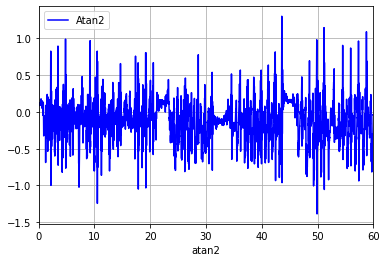

In [83]:
py.plot(t2,the, 'b', linestyle="-",label='Atan2')
# py.plot(t2,y2, 'r', linestyle="--",label='sumbu y',alpha = 0.2)
# py.plot(t2,z2, 'g-', linestyle="--",label='sumbu z',alpha = 0.2)
plt.xlim([0, 60])
py.xlabel('atan2')
py.grid()
py.legend()

In [70]:
ro = []
time = []
sumz = []
#Untuk menghitung rho dengan rumus arctan yang ada di slide perkuliahan
for i in range(len(df2.values)):  
  ro.append( math.atan(df2.values[i][1] / math.sqrt((df2.values[i][2]**2)+(df2.values[i][3]**2)) ) )
  time.append(df2.values[i][0])
  sumz.append(df.values[i][1])

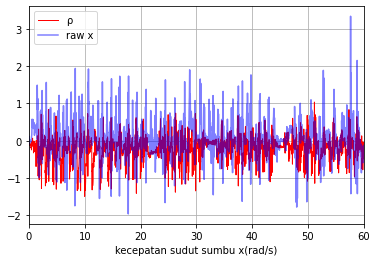

In [81]:
plt.plot(time, rho, 'r-',linewidth=1, label='ρ')
plt.plot(time, sumz, 'b-',label='raw x',alpha = 0.5)
plt.xlim([0, 60])
plt.xlabel('time(s)')
plt.xlabel('kecepatan sudut sumbu x(rad/s)')
plt.grid()
plt.legend()

In [72]:
phi = []
sumy = []
#Untuk menghitung phi dengan rumus arctan yang ada di slide perkuliahan
for i in range(len(df2.values)): 
  phi.append( math.atan(df2.values[i][2] / math.sqrt((df2.values[i][1]**2)+(df2.values[i][3]**2)) ) )
  sumy.append(df.values[i][2])


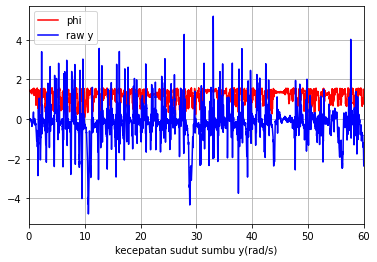

In [73]:
plt.plot(time, phi, 'r-', label='phi') 
plt.plot(time, sumy, 'b-',label='raw y')
plt.xlim([0, 60])
plt.xlabel('time(s)')
plt.xlabel('kecepatan sudut sumbu y(rad/s)')
plt.grid()
plt.legend()

In [74]:
theta= []
sumx = []
#Untuk menghitung theta dengan rumus arctan yang ada di slide perkuliahan
for i in range(len(df2.values)): 
  theta.append( math.atan( math.sqrt((df2.values[i][1]**2)+(df2.values[i][2]**2))/ df2.values[i][3]) )
  sumx.append(df.values[i][1]) 

<ipython-input-74-a4943779a7f2>:5: RuntimeWarning: divide by zero encountered in double_scalars
  theta.append( math.atan( math.sqrt((df2.values[i][1]**2)+(df2.values[i][2]**2))/ df2.values[i][3]) )


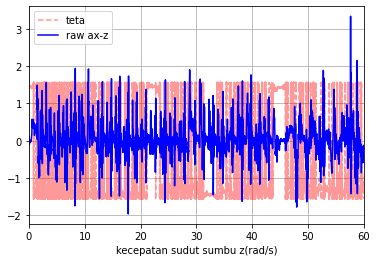

In [75]:
plt.plot(time, teta, 'r-',linestyle="--",label='teta',alpha = 0.4) 
plt.plot(time, sumx, 'b-',label='raw ax-z')
plt.xlim([0, 60])
plt.xlabel('time(s)')
plt.xlabel('kecepatan sudut sumbu z(rad/s)')
plt.grid()
plt.legend()

No 5

In [88]:
DT = (60-0)/(len(df.values)-1) 
#sampling time beradasarkan diamana waktu dibagi dengan jumlah data sehingga didapat timestamp
gyro_angle = df.values*DT  
#integral gyroscope dengan sampling time/timestamp 

In [107]:
gait_angle = [0]
for i in range(len(df2)):
  gait_angle.append(0.8*(gait_angle[i-1]+gyro_angle[i][3])+0.2*teta[i]) 
#rumus saya mengikuti pada slide
gait_angle.pop(0)

0

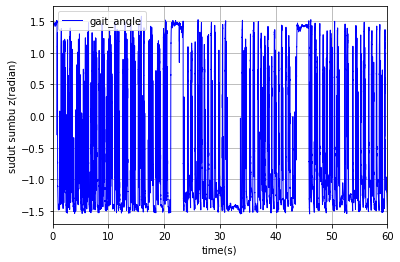

In [108]:
plt.plot(time, gait_angle, 'b-',label='gait_angle',linewidth=1)
plt.xlim([0, 60])
plt.xlabel('time(s)')
plt.ylabel('sudut sumbu z(radian)')
plt.grid()
plt.legend()

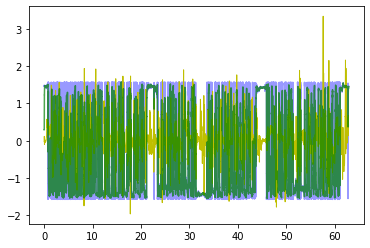

In [109]:
plt.plot(time, teta, 'b-', label='theta',alpha = 0.4) 
plt.plot(time, sumz, 'y-',label='raw ax-z',linewidth=1)
plt.plot(time, gait_angle, 'g-',label='gait_angle',alpha = 0.7)
plt.xlim([0, 60])
plt.xlabel('time(s)')
plt.xlabel('posisi sudut sumbu z(radian)')
plt.grid()
plt.legend()

In [110]:
gait_anglex = [0]
for i in range(len(df2)):
  gait_anglex.append(0.8*(gait_angle[i-1]+gyro_angle[i][1])+0.2*rho[i]) 
gait_anglex.pop(0)

0

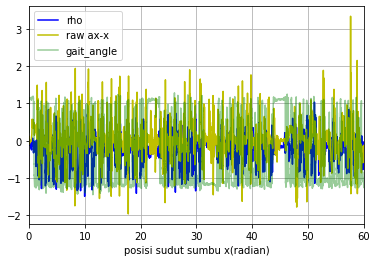

In [111]:
plt.plot(time, rho, 'b-', label='rho') 
plt.plot(time, sumx, 'y-',label='raw ax-x')
plt.plot(time, gait_anglex, 'g-',label='gait_angle',alpha = 0.4)
plt.xlim([0, 60])
plt.xlabel('time(s)')
plt.xlabel('posisi sudut sumbu x(radian)')
plt.grid()
plt.legend()

In [112]:
gait_angley = [0]
for i in range(len(df2)): ##menggunakan Complementary Filter untuk mendapat gait angle
  gait_angley.append(0.8*(gait_angle[i-1]+gyro_angle[i][2])+0.2*phi[i]) ##high dan low pass berdasarkan soal UTS
gait_angley.pop(0)

0

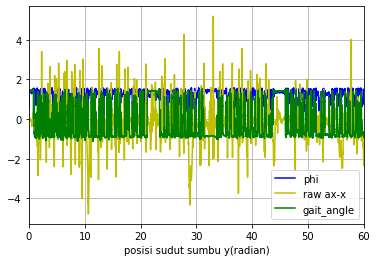

In [113]:
plt.plot(time, phi, 'b-', label='phi')  ###plot berdasarkan data yang ada
plt.plot(time, sumy, 'y-',label='raw ax-x')
plt.plot(time, gait_angley, 'g-',label='gait_angle')
plt.xlim([0, 60])
plt.xlabel('time(s)')
plt.xlabel('posisi sudut sumbu y(radian)')
plt.grid()
plt.legend()